In [5]:
#Importaciones librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



#Importar src
import sys
sys.path.append("..")
from src import sp_analisis_subscripciones

Los resultados de la campaña de marketing efectuada por la institución bancaria portuquesa muestran un conjunto de variables que pueden influir consistentemente en la subscripción de los clientes a un producto bancario , o por lo contrario estas características de los leads pueden no tener relevancia sobre la subscripción durante la venta directa. Durante este anális se va  a llevar a cabo un trabajo de comprensión sobre las posibles relaicones de las cualidades de los perfiles involucrados y el resultado que se obtuvo durante la campaña. De esta manera se conocerá información relevante que se pueda utilizar en futuras campañas para ajustar la selección de los leads y ganar precisión con las ventas.
.Estos modelos son los siguientes enfoques planteados para el análisis:
-Análisis de las correlaciones en las variables numéricas
-Distribuciones del ratio de conversion sobre las variables categóricas

In [6]:
#se cargan los datos
df_correlaciones=pd.read_csv('../data/eda_limpieza_files/df_nulos_numericos_ok.csv',usecols=lambda col:not col.startswith('Unnamed'))

In [7]:
df_correlaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job                43170 non-null  object 
 1   Marital            43170 non-null  object 
 2   Education          43170 non-null  object 
 3   Default            43170 non-null  object 
 4   Housing            43170 non-null  object 
 5   Loan               43170 non-null  object 
 6   Contact            43170 non-null  object 
 7   Duration           43170 non-null  float64
 8   Campaign           43170 non-null  float64
 9   Previous           43170 non-null  float64
 10  Poutcome           43170 non-null  object 
 11  Emp.var.rate       43170 non-null  float64
 12  Cons.price.idx     43170 non-null  float64
 13  Cons.conf.idx      43170 non-null  float64
 14  Nr.employed        43170 non-null  float64
 15  Subscribed         43170 non-null  object 
 16  Date               431

Antes de empezar el análisis se hacen las siguientes transformaciones:

-se eliminan los valores unknown en la columna subscribed del dataframe y se convierte la variable a numérica

-se crea la columna datemonth que agrupa las fechas por mes y lo mismo con dt_customer


In [8]:
#se borran los datos donde se desconoce si el cliente se suscribió o no
df_correlaciones=df_correlaciones[df_correlaciones['Subscribed']!='unknown']

In [9]:
df_correlaciones['Subscribed'].value_counts()

Subscribed
no     38156
yes     4844
Name: count, dtype: int64

In [10]:
#convertimos la variable objetivo a variable numérica, ya que es necesario para el estudio de las correlaciones
df_correlaciones['Subscribed']=df_correlaciones['Subscribed'].apply(lambda x: 1 if x=='yes' else 0)

In [11]:
df_correlaciones['Subscribed'].value_counts()

Subscribed
0    38156
1     4844
Name: count, dtype: int64

In [12]:
df_correlaciones.columns


Index(['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact',
       'Duration', 'Campaign', 'Previous', 'Poutcome', 'Emp.var.rate',
       'Cons.price.idx', 'Cons.conf.idx', 'Nr.employed', 'Subscribed', 'Date',
       'ID', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'City', 'Country', 'Region', 'Age', 'Euribor3m'],
      dtype='object')

In [13]:
# Convertir 'date' a datetime y manejar valores inválidos
df_correlaciones['Date'] = pd.to_datetime(df_correlaciones['Date'], errors='coerce')

df_correlaciones['Dt_Customer'] = pd.to_datetime(df_correlaciones['Dt_Customer'], errors='coerce')

In [14]:
#Se crea la columna datemonth
df_correlaciones['Datemonth'] = df_correlaciones['Date'].dt.to_period('M') 
df_correlaciones['Dt_mt_Customer'] = df_correlaciones['Dt_Customer'].dt.to_period('M') 

In [15]:
df_correlaciones['Date'].dtype

dtype('<M8[ns]')

Correlación entre variables continuas y la variable objetivo

In [16]:
#se crea una lista con las variables continuas
variables_continuas=sp_analisis_subscripciones.detectar_continuas(df_correlaciones)
df_correlaciones[variables_continuas].info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 43169
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Duration           43000 non-null  float64
 1   Campaign           43000 non-null  float64
 2   Previous           43000 non-null  float64
 3   Emp.var.rate       43000 non-null  float64
 4   Cons.price.idx     43000 non-null  float64
 5   Cons.conf.idx      43000 non-null  float64
 6   Nr.employed        43000 non-null  float64
 7   Subscribed         43000 non-null  int64  
 8   Income             43000 non-null  int64  
 9   Kidhome            43000 non-null  int64  
 10  Teenhome           43000 non-null  int64  
 11  NumWebVisitsMonth  43000 non-null  int64  
 12  Age                43000 non-null  int64  
 13  Euribor3m          43000 non-null  float64
dtypes: float64(8), int64(6)
memory usage: 4.9 MB


In [17]:
#se comprueba que no quedan más variables float o int del dataframe
df_correlaciones.drop(columns=variables_continuas).info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 43169
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Job             43000 non-null  object        
 1   Marital         43000 non-null  object        
 2   Education       43000 non-null  object        
 3   Default         43000 non-null  object        
 4   Housing         43000 non-null  object        
 5   Loan            43000 non-null  object        
 6   Contact         43000 non-null  object        
 7   Poutcome        43000 non-null  object        
 8   Date            42752 non-null  datetime64[ns]
 9   ID              43000 non-null  object        
 10  Dt_Customer     43000 non-null  datetime64[ns]
 11  City            43000 non-null  object        
 12  Country         43000 non-null  object        
 13  Region          43000 non-null  object        
 14  Datemonth       42752 non-null  period[M]     
 15  Dt_mt_C

In [18]:
#calcular la matriz de correlación

In [19]:
variables_matriz_continuas=variables_continuas+['Subscribed']

In [20]:
matriz_correlacion_continuas=df_correlaciones[variables_continuas].corr()
matriz_correlacion_continuas

,Duration,Campaign,Previous,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Nr.employed,Subscribed,Income,Kidhome,Teenhome,NumWebVisitsMonth,Age,Euribor3m
Duration,1.000000,-0.071956,0.021285,-0.027158,0.005938,-0.007631,-0.044135,0.404818,-0.002761,-0.000759,-0.005937,0.000750,-0.000072,-0.030637
Campaign,-0.071956,1.000000,-0.079603,0.152084,0.128110,-0.012867,0.145008,-0.066376,-0.003736,-0.006733,0.000802,0.004470,0.005065,0.123427
Previous,0.021285,-0.079603,1.000000,-0.419110,-0.199665,-0.048914,-0.501424,0.232787,-0.003207,-0.000851,-0.003012,-0.001967,0.022785,-0.405720
Emp.var.rate,-0.027158,0.152084,-0.419110,1.000000,0.770803,0.192004,0.907438,-0.298461,-0.008640,-0.004026,0.001431,-0.006914,-0.002768,0.860649
Cons.price.idx,0.005938,0.128110,-0.199665,0.770803,1.000000,0.055509,0.519682,-0.135406,-0.011065,0.001161,0.004205,-0.004050,-0.000379,0.604638
Cons.conf.idx,-0.007631,-0.012867,-0.048914,0.192004,0.055509,1.000000,0.098223,0.057316,0.001571,-0.002109,0.000989,0.006740,0.120247,0.242263
Nr.employed,-0.044135,0.145008,-0.501424,0.907438,0.519682,0.098223,1.000000,-0.355665,-0.003935,-0.007267,-0.000760,-0.010091,-0.017874,0.839559
Subscribed,0.404818,-0.066376,0.232787,-0.298461,-0.135406,0.057316,-0.355665,1.000000,-0.004635,0.000162,-0.000743,0.000561,0.029122,-0.277259
Income,-0.002761,-0.003736,-0.003207,-0.008640,-0.011065,0.001571,-0.003935,-0.004635,1.000000,0.001350,0.006480,0.002500,0.001365,-0.004011
Kidhome,-0.000759,-0.006733,-0.000851,-0.004026,0.001161,-0.002109,-0.007267,0.000162,0.001350,1.000000,-0.001352,-0.005629,0.000926,-0.005404


En la tabla de arriba se puede ver como las correlaciones que afectan a la variable subscribed no superan el 0.4. La única que tiene una relación moderada es Duration. Se puede concluir con que a mayor duración hay moderadamente mayor probabilidad de tener exito en la llamada. No obstante, el indicador no es lo suficientemente alto como para ir más en detalle con el análisis.

In [21]:
#análisis de las variables categóricas

In [22]:
#detección de las variables categóricas
variables_categoricas=sp_analisis_subscripciones.detectar_categoricas(df_correlaciones)
# Excluir 'date', 'id' y otras columnas no deseadas
variables_categoricas = [col for col in variables_categoricas if col not in ['ID', 'Date','Dt_Customer']]

df_correlaciones[variables_categoricas].info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 43169
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Job             43000 non-null  object   
 1   Marital         43000 non-null  object   
 2   Education       43000 non-null  object   
 3   Default         43000 non-null  object   
 4   Housing         43000 non-null  object   
 5   Loan            43000 non-null  object   
 6   Contact         43000 non-null  object   
 7   Poutcome        43000 non-null  object   
 8   City            43000 non-null  object   
 9   Country         43000 non-null  object   
 10  Region          43000 non-null  object   
 11  Datemonth       42752 non-null  period[M]
 12  Dt_mt_Customer  43000 non-null  period[M]
dtypes: object(11), period[M](2)
memory usage: 4.6+ MB


In [23]:
df_correlaciones.drop(columns=variables_categoricas).info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 43169
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Duration           43000 non-null  float64       
 1   Campaign           43000 non-null  float64       
 2   Previous           43000 non-null  float64       
 3   Emp.var.rate       43000 non-null  float64       
 4   Cons.price.idx     43000 non-null  float64       
 5   Cons.conf.idx      43000 non-null  float64       
 6   Nr.employed        43000 non-null  float64       
 7   Subscribed         43000 non-null  int64         
 8   Date               42752 non-null  datetime64[ns]
 9   ID                 43000 non-null  object        
 10  Income             43000 non-null  int64         
 11  Kidhome            43000 non-null  int64         
 12  Teenhome           43000 non-null  int64         
 13  Dt_Customer        43000 non-null  datetime64[ns]
 14  NumWebVisit

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


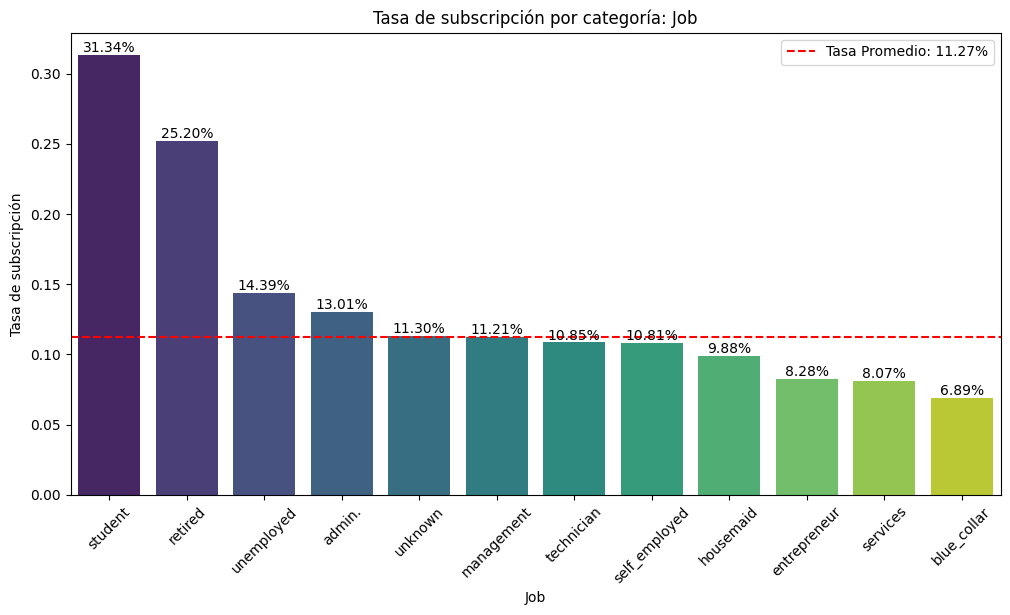

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


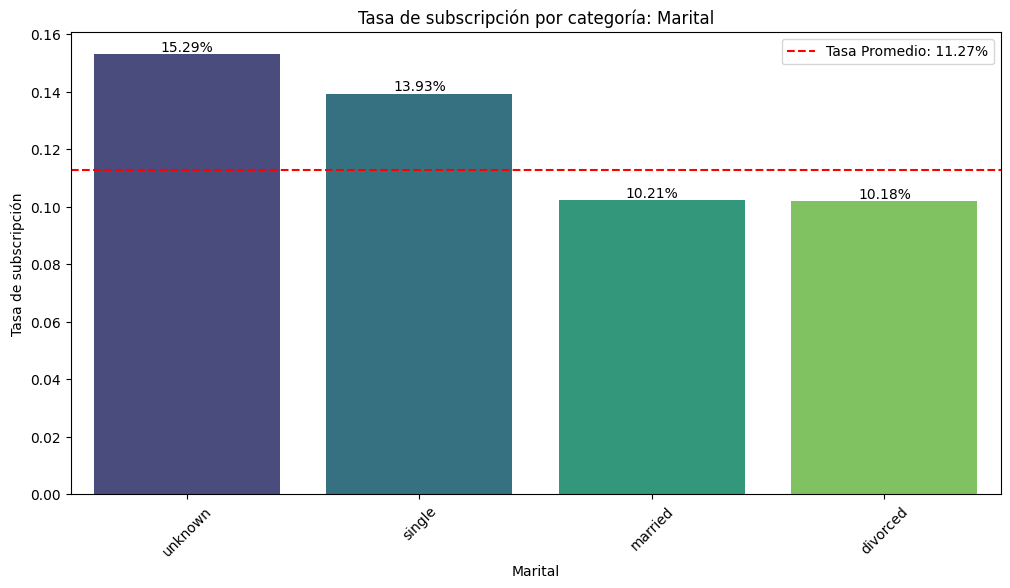

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


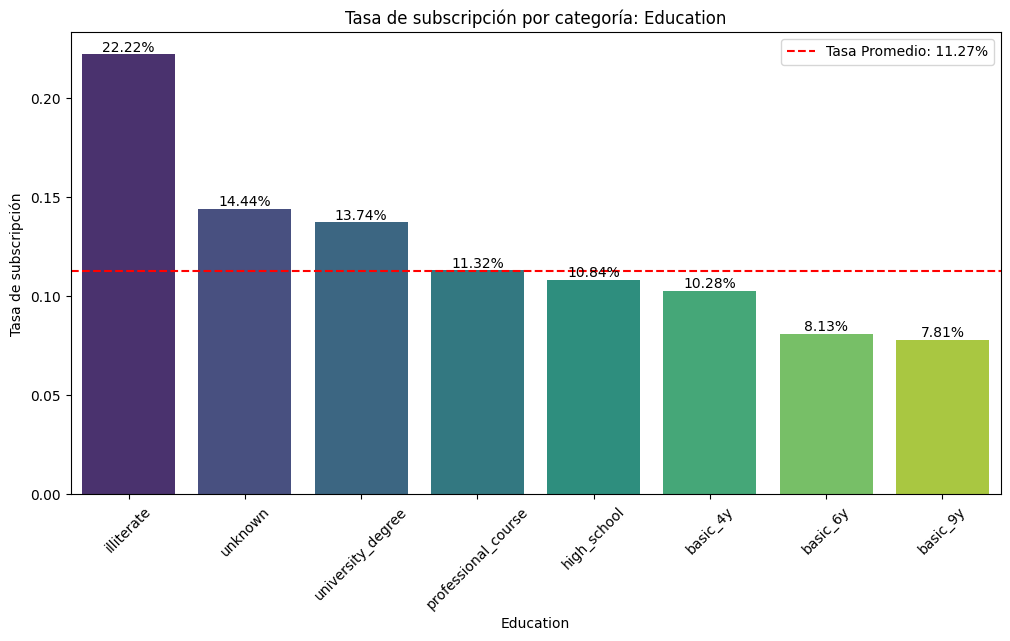

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


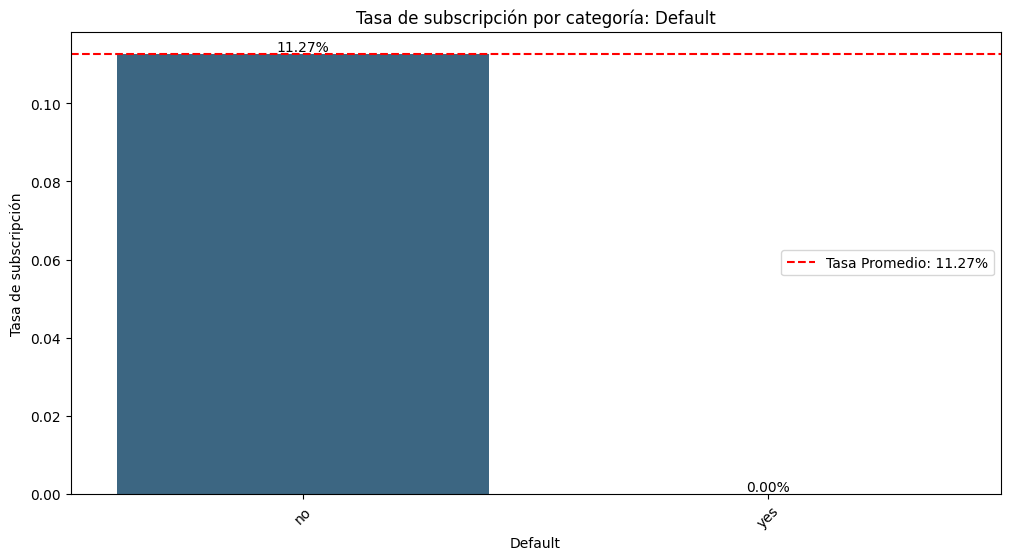

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


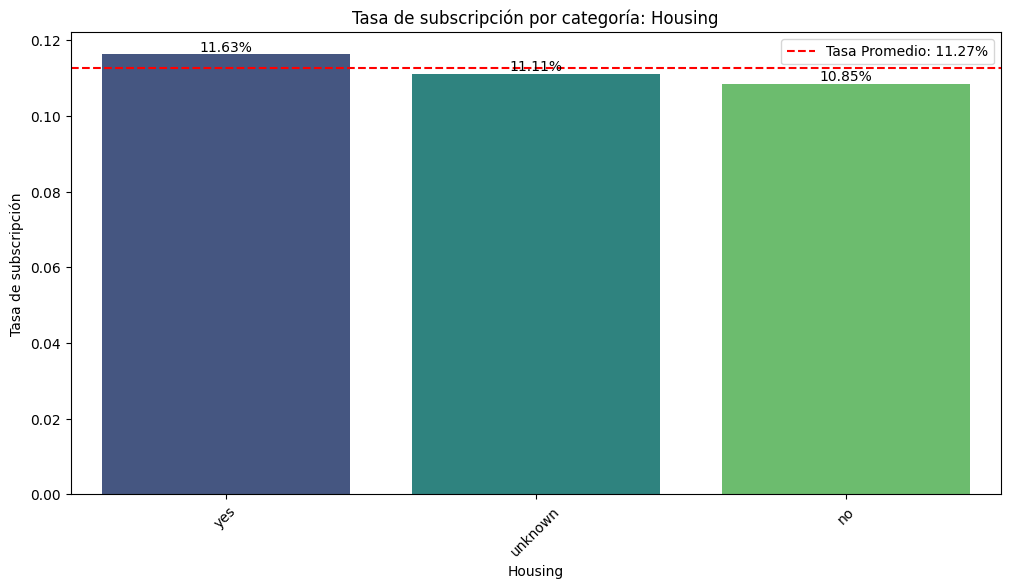

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


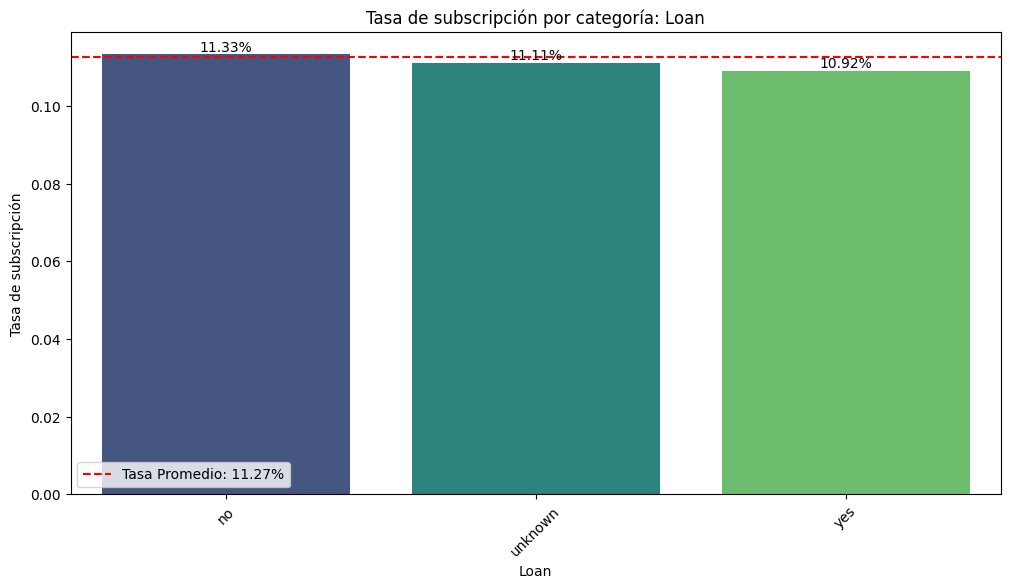

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


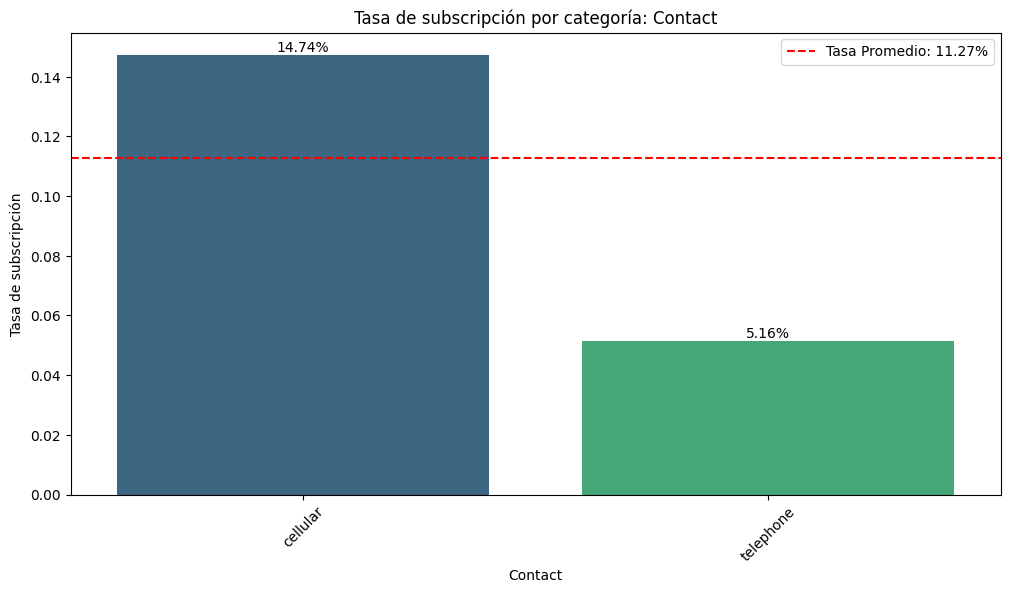

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


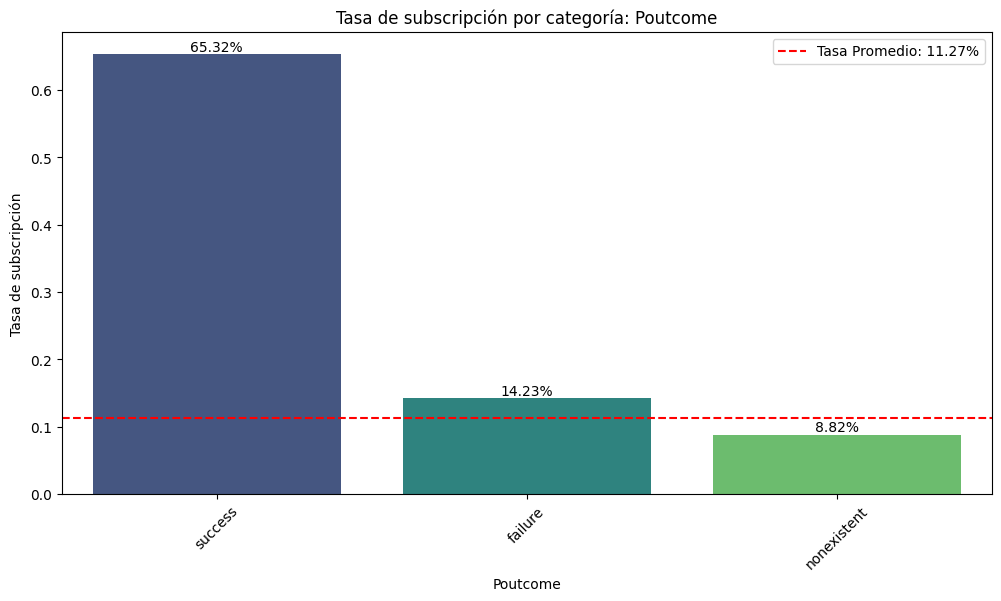

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")
c:\Users\matis\Desktop\EDA_MK_POWER\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


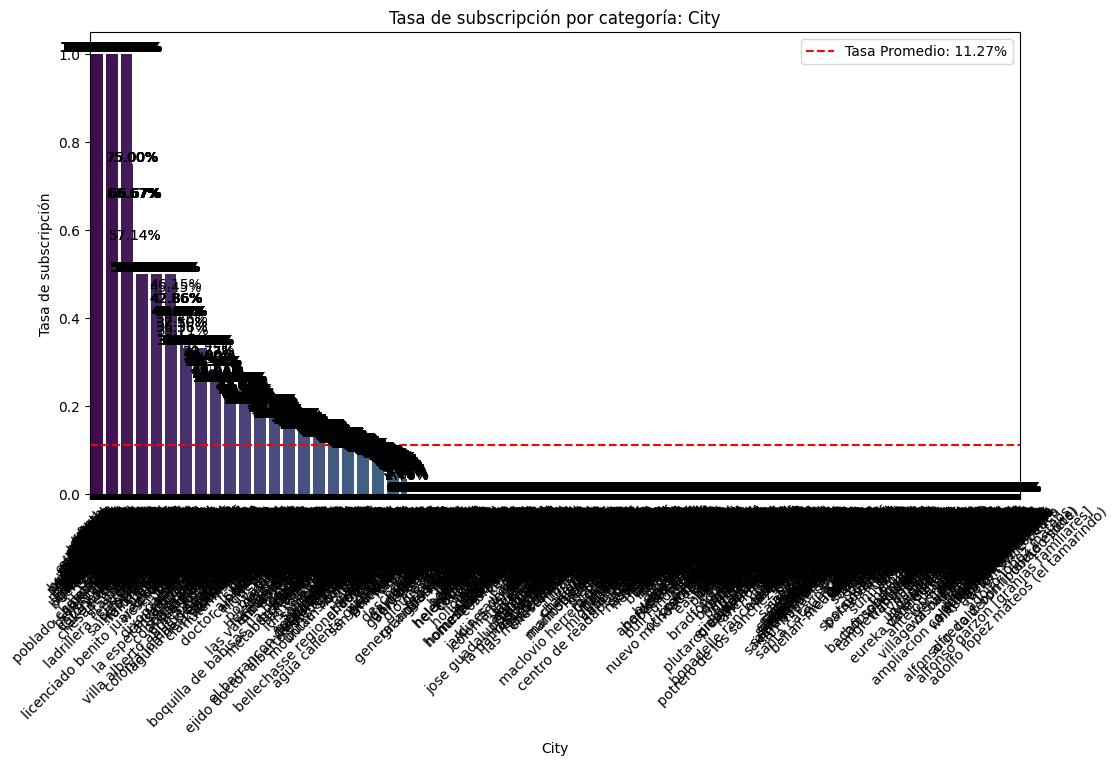

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


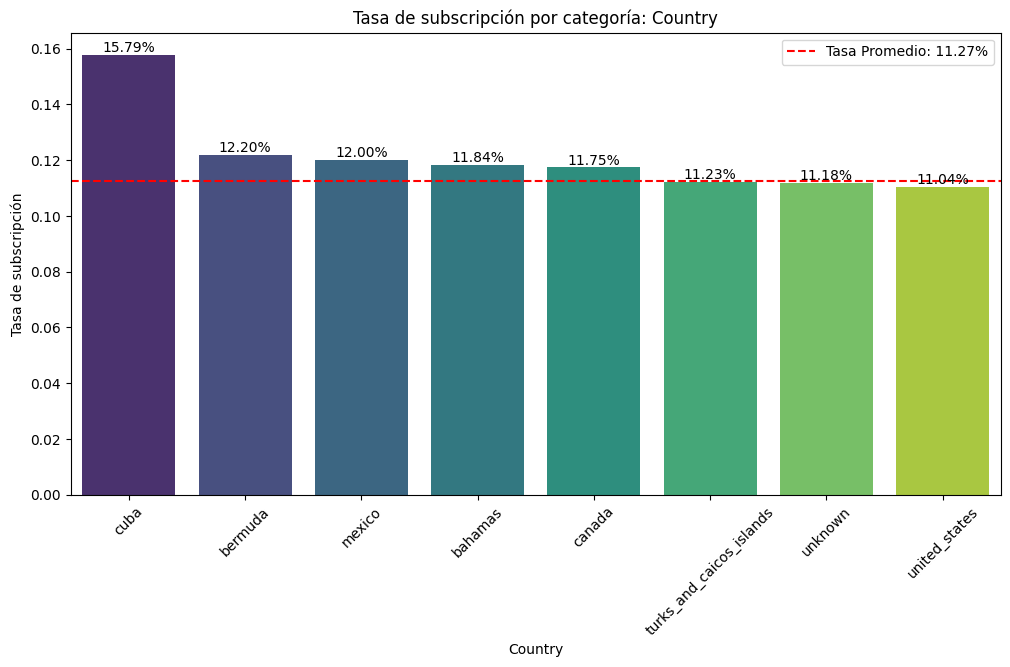

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


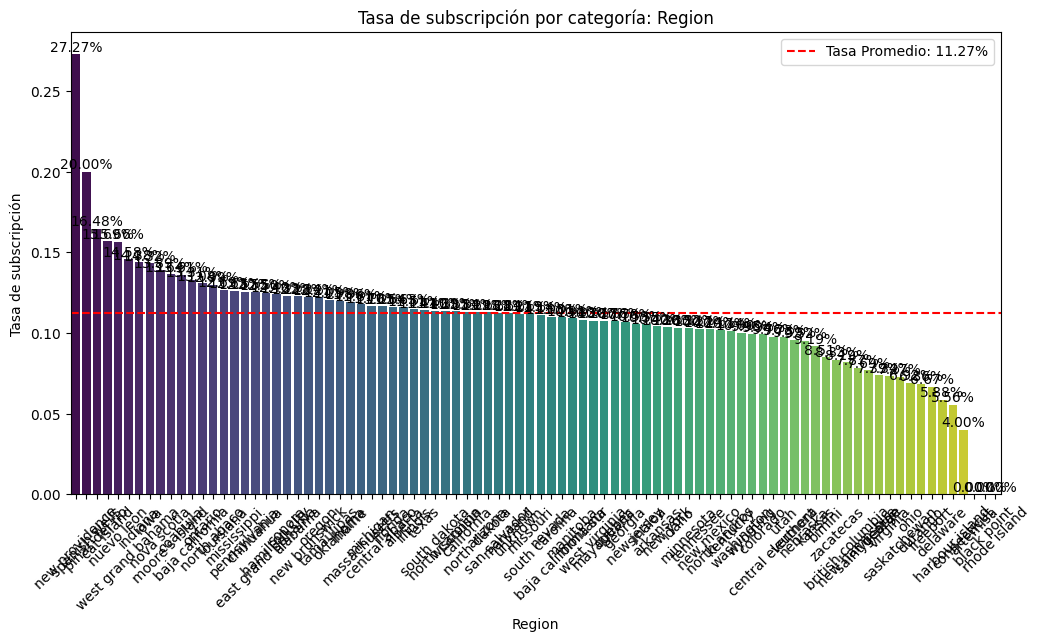

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


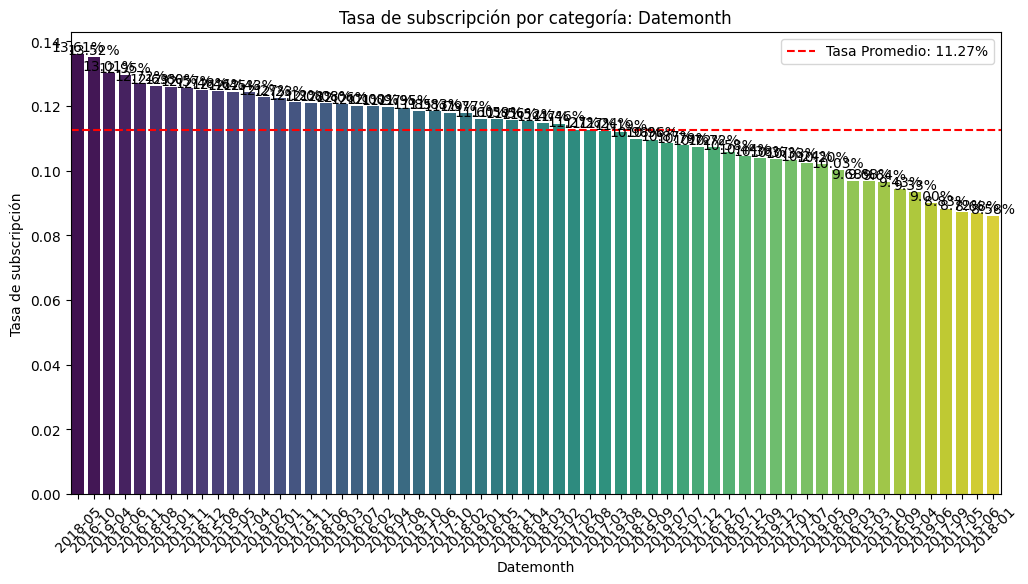

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette="viridis")


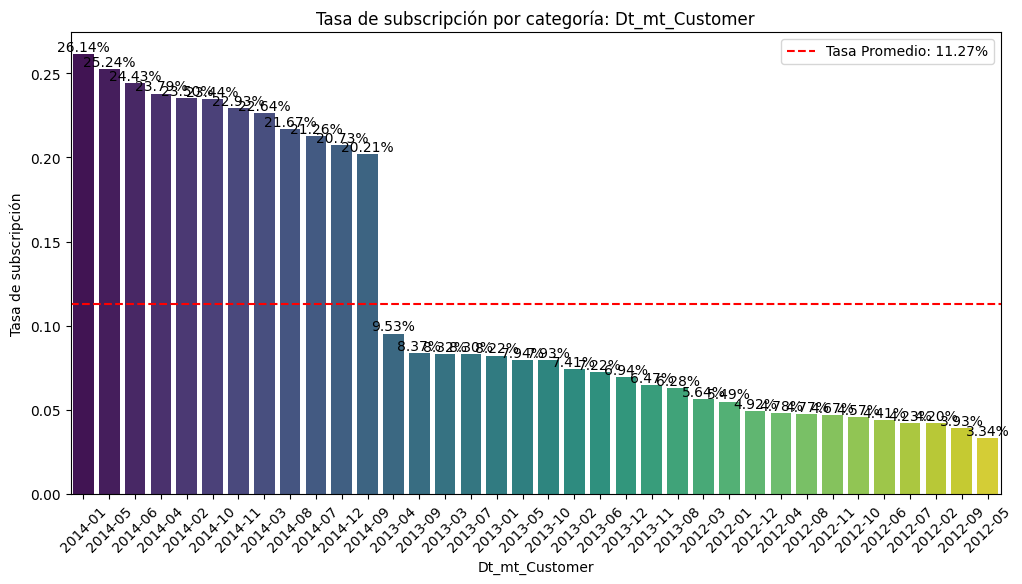

In [24]:
##Representamos las tasas de subscripción por categoría
sp_analisis_subscripciones.plot_subscription_rate(df_correlaciones,variables_categoricas,'Subscribed')

In [25]:
#Calculamos kpis generales del anaálisis

In [26]:
#Tasa conversión global
sp_analisis_subscripciones.calcular_tasa_conversion(df_correlaciones,'Subscribed')

11.27

In [27]:
#Calculo del número de años transcurridos duarnte la campaña
sp_analisis_subscripciones.calcular_duración_campaña(df_correlaciones,'Date')

4.996577686516085

In [28]:
#Cálculo del úmero de clientes contactados
df_correlaciones['ID'].nunique()

43000

In [29]:
#calculo de la media de contactos por cliente
media_contactos=df_correlaciones['Campaign'].mean()
print(media_contactos)

2.5672325581395348


In [ ]:
#calculo de las subscripciones por categorías: primera tabla muestra el numero de leads y segunda el numero de converted
sp_analisis_subscripciones.tabla_volumetrias_subscripciones(df_correlaciones,variables_categoricas,'Subscribed')

Job
admin.           10873
blue_collar       9654
entrepreneur      1522
housemaid         1123
management        3050
retired           1790
self_employed     1489
services          4162
student            903
technician        7026
unemployed        1063
unknown            345
Name: Subscribed, dtype: int64
-----------------------------
Job
admin.           1415
blue_collar       665
entrepreneur      126
housemaid         111
management        342
retired           451
self_employed     161
services          336
student           283
technician        762
unemployed        153
unknown            39
Name: Subscribed, dtype: int64
-----------------------------
Marital
divorced     4811
married     25999
single      12105
unknown        85
Name: Subscribed, dtype: int64
-----------------------------
Marital
divorced     490
married     2655
single      1686
unknown       13
Name: Subscribed, dtype: int64
-----------------------------
Education
basic_4y                4356
basic_6y     

Contact
cellular     27396
telephone    15604
Name: Subscribed, dtype: int64
-----------------------------
Contact
cellular     4039
telephone     805
Name: Subscribed, dtype: int64
-----------------------------
Poutcome
failure         4461
nonexistent    37103
success         1436
Name: Subscribed, dtype: int64
-----------------------------
Poutcome
failure         635
nonexistent    3271
success         938
Name: Subscribed, dtype: int64
-----------------------------
City
31 de octubre               1
abbeville                  12
abbotsford                  1
aberdeen                   19
aberdeen proving ground     1
                           ..
zion                        1
zionsville                  1
zumbrota                    1
zuni pueblo                 7
zwolle                      3
Name: Subscribed, Length: 6573, dtype: int64
-----------------------------
City
31 de octubre              0
abbeville                  0
abbotsford                 0
aberdeen               

c:\Users\matis\Desktop\EDA_MK_POWER\jupyters\..\src\sp_analisis_subscripciones.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscription_rate.index.astype(str), y=subscription_rate.values, palette="coolwarm")


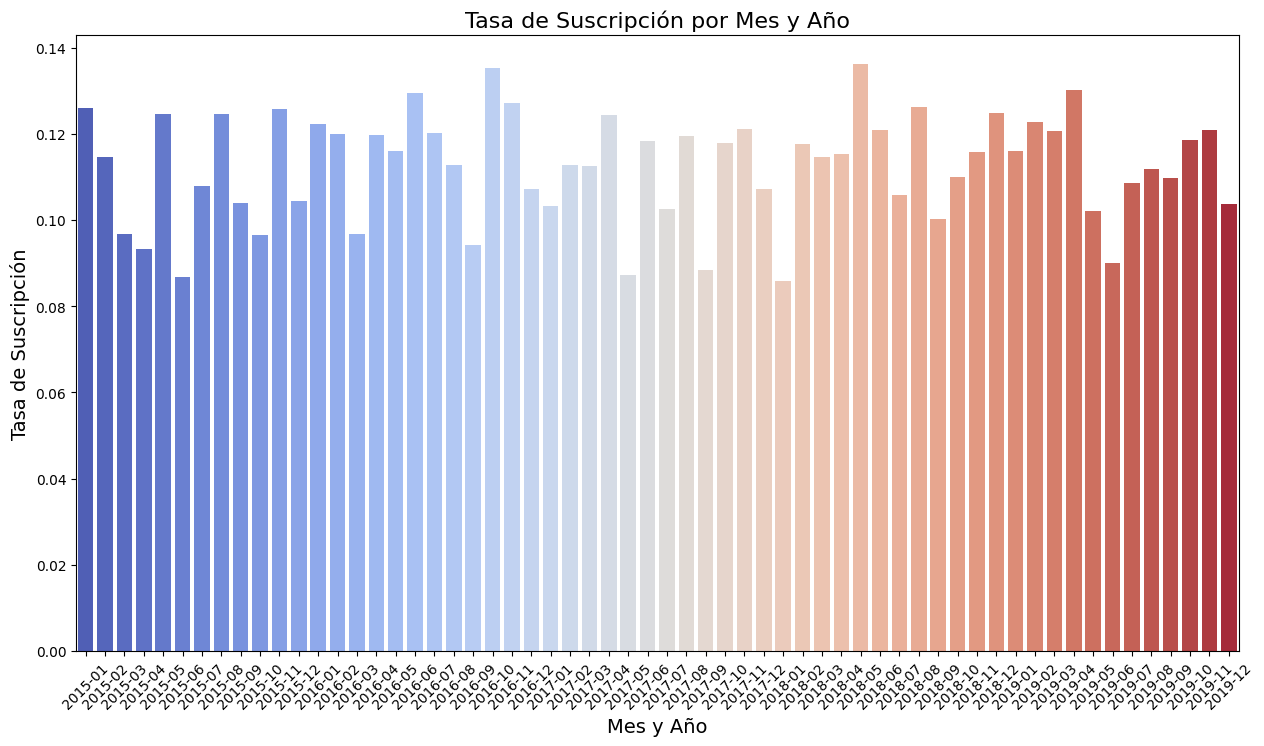

In [31]:
sp_analisis_subscripciones.plot_subscription_by_month(df_correlaciones,'Date','Subscribed')

In [32]:
sp_analisis_subscripciones.tabla_fechas(df_correlaciones,'Date','Subscribed')

month_year
2015-01    738
2015-02    707
2015-03    754
2015-04    750
2015-05    699
2015-06    691
2015-07    723
2015-08    690
2015-09    703
2015-10    674
2015-11    716
2015-12    699
2016-01    703
2016-02    675
2016-03    692
2016-04    710
2016-05    673
2016-06    749
2016-07    691
2016-08    719
2016-09    732
2016-10    732
2016-11    739
2016-12    718
2017-01    736
2017-02    692
2017-03    685
2017-04    724
2017-05    688
2017-06    710
2017-07    703
2017-08    753
2017-09    725
2017-10    738
2017-11    718
2017-12    690
2018-01    699
2018-02    739
2018-03    689
2018-04    729
2018-05    742
2018-06    720
2018-07    747
2018-08    697
2018-09    678
2018-10    701
2018-11    735
2018-12    673
2019-01    724
2019-02    774
2019-03    713
2019-04    707
2019-05    696
2019-06    733
2019-07    727
2019-08    697
2019-09    675
2019-10    675
2019-11    720
2019-12    723
Freq: M, Name: Subscribed, dtype: int64
-----------------------------
month_year
2015-01 